# Vizualizacija Statističkih Veza i Raspodela

## Seminarski rad - SISJ

### Deo 6: Analiza statističkih odnosa i distribucija podataka

---

## 1. Uvod u statističke veze i raspodele

**Statistička analiza** je osnova za razumevanje podataka. Seaborn pruža moćne alate za vizualizaciju **odnosa između varijabli** i **distribucija podataka**.

### 1.1 Tipovi statističkih veza:

#### **Korelacija**
- Linearni odnos između kontinuiranih varijabli
- Meri jačinu i smer veze (-1 do +1)
- Pearson, Spearman, Kendall korelacije

#### **Kovarijansa**
- Meri kako se dve varijable menjaju zajedno
- Nije standardizovana kao korelacija
- Zavisi od jedinica merenja

#### **Asocijacija**
- Opšti termin za bilo koji odnos između varijabli
- Uključuje i nelinearne odnose
- Može biti uzročna ili slučajna

### 1.2 Seaborn alati za analizu:

- **Correlation heatmaps** - matrice korelacija
- **Pair plots** - multiple scatterplots
- **Joint plots** - kombinovane analize
- **Distribution plots** - histogrami, KDE, box plots
- **Regression plots** - linearne i nelinearne veze


=== ANALIZA STATISTIČKIH VEZA I RASPODELA ===
Tips dataset: (244, 7)
Iris dataset: (150, 5)

Korelacijska matrica Tips dataset:
            total_bill    tip   size
total_bill       1.000  0.676  0.598
tip              0.676  1.000  0.489
size             0.598  0.489  1.000


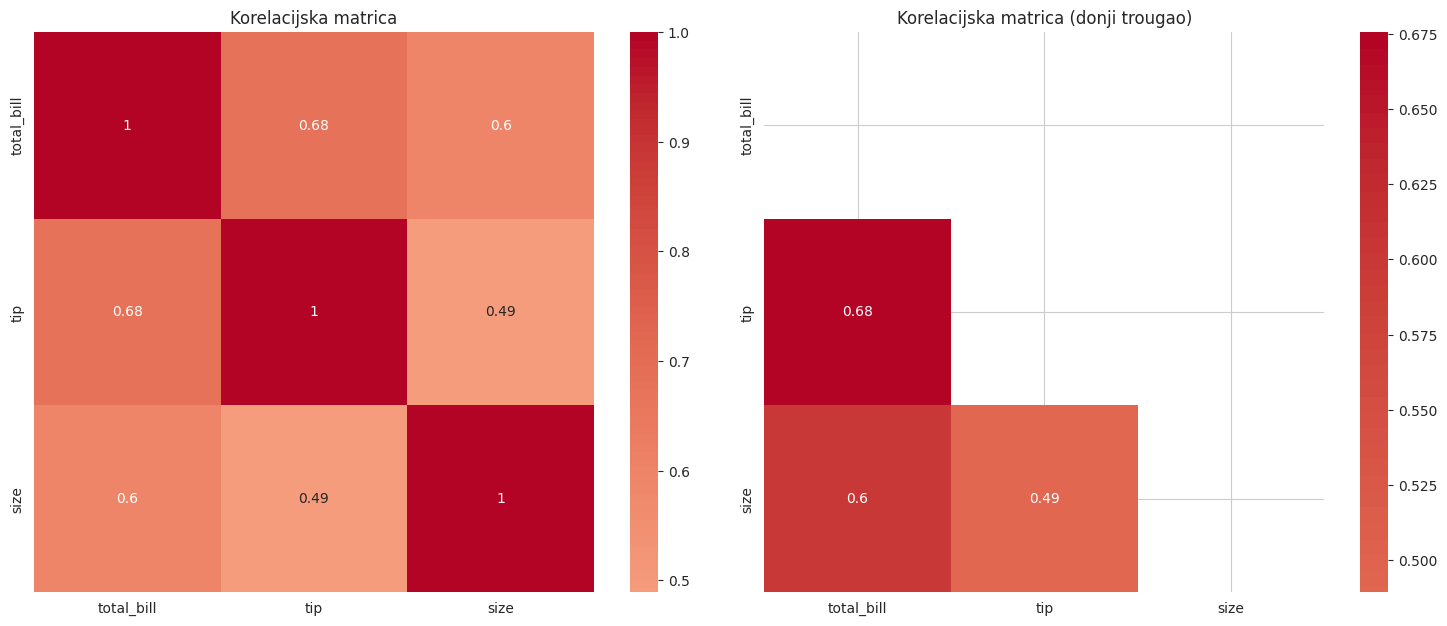


=== ANALIZA KORELACIJA ===
Najjača pozitivna korelacija:
total_bill - tip: 0.676
Ova korelacija je očekivana - veći račun = veća napojnica!


In [1]:
# Uvoz potrebnih biblioteka
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import warnings

# Podešavanje
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)

# Učitavanje podataka
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

print("=== ANALIZA STATISTIČKIH VEZA I RASPODELA ===")
print(f"Tips dataset: {tips.shape}")
print(f"Iris dataset: {iris.shape}")

# Korelacijska analiza
numeric_tips = tips.select_dtypes(include=[np.number])
correlation_matrix = numeric_tips.corr()

print("\nKorelacijska matrica Tips dataset:")
print(correlation_matrix.round(3))

# Heatmap korelacijske matrice
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Osnovna heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0])
axes[0].set_title('Korelacijska matrica')

# Heatmap sa maskom
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, ax=axes[1])
axes[1].set_title('Korelacijska matrica (donji trougao)')

plt.tight_layout()
plt.show()

print("\n=== ANALIZA KORELACIJA ===")
correlations = correlation_matrix.unstack().sort_values(ascending=False)
correlations = correlations[correlations < 1.0]

print("Najjača pozitivna korelacija:")
strongest = correlations.iloc[0]
vars_names = correlations.index[0]
print(f"{vars_names[0]} - {vars_names[1]}: {strongest:.3f}")
print("Ova korelacija je očekivana - veći račun = veća napojnica!")
